# 1. Problem Statement

# 2. Import Libraries

In [1]:
import numpy as np
import pandas as pd

In [2]:
car_df = pd.read_csv('car_crash.csv')
car_df.head()

,Unnamed: 0,dvcat,weight,Survived,airbag,seatbelt,frontal,sex,ageOFocc,yearacc,yearVeh,abcat,occRole,deploy,injSeverity,caseid
0,0,55+,27.078,Not_Survived,none,none,1,m,32,1997,1987.0,unavail,driver,0,4.0,2:13:2
1,1,25-39,89.627,Not_Survived,airbag,belted,0,f,54,1997,1994.0,nodeploy,driver,0,4.0,2:17:1
2,2,55+,27.078,Not_Survived,none,belted,1,m,67,1997,1992.0,unavail,driver,0,4.0,2:79:1
3,3,55+,27.078,Not_Survived,none,belted,1,f,64,1997,1992.0,unavail,pass,0,4.0,2:79:1
4,4,55+,13.374,Not_Survived,none,none,1,m,23,1997,1986.0,unavail,driver,0,4.0,4:58:1


In [3]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11217 entries, 0 to 11216
Data columns (total 16 columns):
Unnamed: 0     11217 non-null int64
dvcat          11217 non-null object
weight         11217 non-null float64
Survived       11217 non-null object
airbag         11217 non-null object
seatbelt       11217 non-null object
frontal        11217 non-null int64
sex            11217 non-null object
ageOFocc       11217 non-null int64
yearacc        11217 non-null int64
yearVeh        11217 non-null float64
abcat          11217 non-null object
occRole        11217 non-null object
deploy         11217 non-null int64
injSeverity    11140 non-null float64
caseid         11217 non-null object
dtypes: float64(3), int64(5), object(8)
memory usage: 1.4+ MB


In [4]:
car_df.shape

(11217, 16)

In [5]:
car_df.isna().sum()     # To know the how many null values in our data set

Unnamed: 0      0
dvcat           0
weight          0
Survived        0
airbag          0
seatbelt        0
frontal         0
sex             0
ageOFocc        0
yearacc         0
yearVeh         0
abcat           0
occRole         0
deploy          0
injSeverity    77
caseid          0
dtype: int64

In [7]:
car_df['injSeverity'].unique

<bound method Series.unique of 0        4.0
1        4.0
2        4.0
3        4.0
4        4.0
5        4.0
6        4.0
7        4.0
8        4.0
9        4.0
10       4.0
11       4.0
12       4.0
13       4.0
14       4.0
15       4.0
16       4.0
17       4.0
18       4.0
19       3.0
20       3.0
21       4.0
22       4.0
23       4.0
24       4.0
25       4.0
26       4.0
27       4.0
28       4.0
29       4.0
        ... 
11187    0.0
11188    2.0
11189    3.0
11190    1.0
11191    0.0
11192    0.0
11193    4.0
11194    1.0
11195    1.0
11196    1.0
11197    1.0
11198    1.0
11199    3.0
11200    1.0
11201    1.0
11202    3.0
11203    2.0
11204    2.0
11205    0.0
11206    0.0
11207    1.0
11208    1.0
11209    0.0
11210    0.0
11211    2.0
11212    0.0
11213    2.0
11214    3.0
11215    0.0
11216    0.0
Name: injSeverity, Length: 11217, dtype: float64>

In [9]:
car_df['injSeverity'].value_counts()

3.0    3337
0.0    2734
1.0    2218
2.0    1682
4.0    1101
5.0      68
Name: injSeverity, dtype: int64

In [11]:
car_df.isna().sum()/len(car_df)*100  # in real industry we calculate null vallue in this metod

Unnamed: 0     0.000000
dvcat          0.000000
weight         0.000000
Survived       0.000000
airbag         0.000000
seatbelt       0.000000
frontal        0.000000
sex            0.000000
ageOFocc       0.000000
yearacc        0.000000
yearVeh        0.000000
abcat          0.000000
occRole        0.000000
deploy         0.000000
injSeverity    0.686458
caseid         0.000000
dtype: float64

In [13]:
car_df.describe(include='all')

,Unnamed: 0,dvcat,weight,Survived,airbag,seatbelt,frontal,sex,ageOFocc,yearacc,yearVeh,abcat,occRole,deploy,injSeverity,caseid
count,11217.000000,11217,11217.000000,11217,11217,11217,11217.000000,11217,11217.000000,11217.000000,11217.000000,11217,11217,11217.000000,11140.000000,11217
unique,NaN,5,NaN,2,2,2,NaN,2,NaN,NaN,NaN,3,2,NaN,NaN,6488
top,NaN,10-24,NaN,survived,airbag,belted,NaN,m,NaN,NaN,NaN,deploy,driver,NaN,NaN,73:100:2
freq,NaN,5414,NaN,10037,7064,7849,NaN,6048,NaN,NaN,NaN,4365,8786,NaN,NaN,7
mean,5608.000000,NaN,431.405309,NaN,NaN,NaN,0.644022,NaN,37.427654,2001.103236,1994.177944,NaN,NaN,0.389141,1.825583,NaN
std,3238.213319,NaN,1406.202941,NaN,NaN,NaN,0.478830,NaN,18.192429,1.056805,5.658704,NaN,NaN,0.487577,1.378535,NaN
min,0.000000,NaN,0.000000,NaN,NaN,NaN,0.000000,NaN,16.000000,1997.000000,1953.000000,NaN,NaN,0.000000,0.000000,NaN
25%,2804.000000,NaN,28.292000,NaN,NaN,NaN,0.000000,NaN,22.000000,2001.000000,1991.000000,NaN,NaN,0.000000,1.000000,NaN
50%,5608.000000,NaN,82.195000,NaN,NaN,NaN,1.000000,NaN,33.000000,2001.000000,1995.000000,NaN,NaN,0.000000,2.000000,NaN
75%,8412.000000,NaN,324.056000,NaN,NaN,NaN,1.000000,NaN,48.000000,2002.000000,1999.000000,NaN,NaN,1.000000,3.000000,NaN


In [14]:
car_df['injSeverity'].fillna(car_df['injSeverity'].mode()[0], inplace= True)

In [15]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11217 entries, 0 to 11216
Data columns (total 16 columns):
Unnamed: 0     11217 non-null int64
dvcat          11217 non-null object
weight         11217 non-null float64
Survived       11217 non-null object
airbag         11217 non-null object
seatbelt       11217 non-null object
frontal        11217 non-null int64
sex            11217 non-null object
ageOFocc       11217 non-null int64
yearacc        11217 non-null int64
yearVeh        11217 non-null float64
abcat          11217 non-null object
occRole        11217 non-null object
deploy         11217 non-null int64
injSeverity    11217 non-null float64
caseid         11217 non-null object
dtypes: float64(3), int64(5), object(8)
memory usage: 1.4+ MB


In [16]:
car_df['dvcat'].unique()

array(['55+', '25-39', '10-24', '40-54', '1-9km/h'], dtype=object)

In [17]:
car_df['Survived'].unique()

array(['Not_Survived', 'survived'], dtype=object)

In [20]:
car_df['Survived'].replace({'survived': 1,'Not_Survived': 0}, inplace = True)

In [23]:
car_df['airbag'].unique()

array(['none', 'airbag'], dtype=object)

In [24]:
car_df['airbag'].replace({'none': 1, 'airbag': 0}, inplace= True)

In [26]:
car_df['seatbelt'].unique()

array(['none', 'belted'], dtype=object)

In [27]:
car_df['seatbelt'].replace({'none': 1, 'belted': 0}, inplace= True)

In [28]:
car_df['sex'].unique()

array(['m', 'f'], dtype=object)

In [29]:
car_df['sex'].replace({'m': 1, 'f': 0}, inplace= True)

In [30]:
car_df['abcat'].unique()

array(['unavail', 'nodeploy', 'deploy'], dtype=object)

In [31]:
car_df['occRole'].unique()

array(['driver', 'pass'], dtype=object)

In [32]:
car_df['occRole'].replace({'driver': 1, 'pass': 0}, inplace= True)

In [34]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11217 entries, 0 to 11216
Data columns (total 16 columns):
Unnamed: 0     11217 non-null int64
dvcat          11217 non-null object
weight         11217 non-null float64
Survived       11217 non-null int64
airbag         11217 non-null int64
seatbelt       11217 non-null int64
frontal        11217 non-null int64
sex            11217 non-null int64
ageOFocc       11217 non-null int64
yearacc        11217 non-null int64
yearVeh        11217 non-null float64
abcat          11217 non-null object
occRole        11217 non-null int64
deploy         11217 non-null int64
injSeverity    11217 non-null float64
caseid         11217 non-null object
dtypes: float64(3), int64(10), object(3)
memory usage: 1.4+ MB


# Label Encoding

In [36]:
from sklearn.preprocessing import LabelEncoder

In [37]:
le = LabelEncoder()

In [38]:
car_df['dvcat']=le.fit_transform(car_df['dvcat'])

In [39]:
car_df['abcat']=le.fit_transform(car_df['abcat'])

In [40]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11217 entries, 0 to 11216
Data columns (total 16 columns):
Unnamed: 0     11217 non-null int64
dvcat          11217 non-null int32
weight         11217 non-null float64
Survived       11217 non-null int64
airbag         11217 non-null int64
seatbelt       11217 non-null int64
frontal        11217 non-null int64
sex            11217 non-null int64
ageOFocc       11217 non-null int64
yearacc        11217 non-null int64
yearVeh        11217 non-null float64
abcat          11217 non-null int32
occRole        11217 non-null int64
deploy         11217 non-null int64
injSeverity    11217 non-null float64
caseid         11217 non-null object
dtypes: float64(3), int32(2), int64(10), object(1)
memory usage: 1.3+ MB


In [50]:
car_df.drop(['caseid'],axis = 1,inplace= True)

In [51]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11217 entries, 0 to 11216
Data columns (total 15 columns):
Unnamed: 0     11217 non-null int64
dvcat          11217 non-null int32
weight         11217 non-null float64
Survived       11217 non-null int64
airbag         11217 non-null int64
seatbelt       11217 non-null int64
frontal        11217 non-null int64
sex            11217 non-null int64
ageOFocc       11217 non-null int64
yearacc        11217 non-null int64
yearVeh        11217 non-null float64
abcat          11217 non-null int32
occRole        11217 non-null int64
deploy         11217 non-null int64
injSeverity    11217 non-null float64
dtypes: float64(3), int32(2), int64(10)
memory usage: 1.2 MB


In [52]:
car_df.corr()

,Unnamed: 0,dvcat,weight,Survived,airbag,seatbelt,frontal,sex,ageOFocc,yearacc,yearVeh,abcat,occRole,deploy,injSeverity
Unnamed: 0,1.000000,-0.131854,0.032443,0.332908,-0.125035,-0.098996,0.048826,-0.014170,-0.050093,0.848152,0.181146,-0.105042,0.008381,0.063868,-0.170589
dvcat,-0.131854,1.000000,-0.145590,-0.415593,0.160533,0.205410,0.051341,0.075768,-0.033358,-0.233494,-0.166158,0.057847,0.015879,0.055622,0.469143
weight,0.032443,-0.145590,1.000000,0.091640,0.003574,-0.078739,0.000659,-0.006471,-0.040111,0.056892,-0.015226,0.038795,0.000219,-0.065783,-0.220659
Survived,0.332908,-0.415593,0.091640,1.000000,-0.139679,-0.206467,0.107990,-0.046499,-0.135473,0.549885,0.165096,-0.107829,0.023460,0.054346,-0.517637
airbag,-0.125035,0.160533,0.003574,-0.139679,1.000000,0.157501,0.050272,0.092886,-0.025109,-0.181478,-0.766181,0.896724,-0.086011,-0.611983,0.124394
seatbelt,-0.098996,0.205410,-0.078739,-0.206467,0.157501,1.000000,0.066590,0.117071,-0.066066,-0.149208,-0.180534,0.111991,-0.047712,-0.044132,0.283063
frontal,0.048826,0.051341,0.000659,0.107990,0.050272,0.066590,1.000000,0.055639,-0.048856,0.059768,-0.024267,-0.117856,0.033721,0.260388,-0.053709
sex,-0.014170,0.075768,-0.006471,-0.046499,0.092886,0.117071,0.055639,1.000000,-0.063575,-0.025957,-0.097390,0.071708,0.116228,-0.036143,-0.021284
ageOFocc,-0.050093,-0.033358,-0.040111,-0.135473,-0.025109,-0.066066,-0.048856,-0.063575,1.000000,-0.072271,-0.002070,-0.008569,0.052485,-0.009556,0.123495
yearacc,0.848152,-0.233494,0.056892,0.549885,-0.181478,-0.149208,0.059768,-0.025957,-0.072271,1.000000,0.247743,-0.151650,0.018217,0.091252,-0.300495


In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

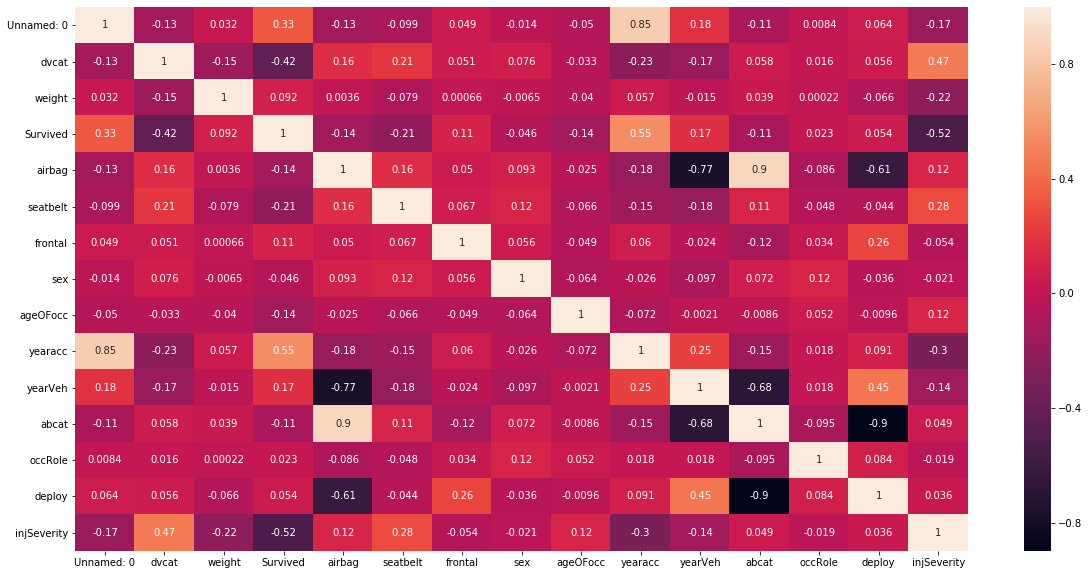

In [59]:
plt.figure(figsize=(20,10))
sns.heatmap(car_df.corr(),annot = True)

In [67]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11217 entries, 0 to 11216
Data columns (total 10 columns):
dvcat          11217 non-null int32
Survived       11217 non-null int64
airbag         11217 non-null int64
seatbelt       11217 non-null int64
ageOFocc       11217 non-null int64
yearacc        11217 non-null int64
yearVeh        11217 non-null float64
abcat          11217 non-null int32
deploy         11217 non-null int64
injSeverity    11217 non-null float64
dtypes: float64(2), int32(2), int64(6)
memory usage: 788.8 KB


In [68]:
car_df.columns

Index(['dvcat', 'Survived', 'airbag', 'seatbelt', 'ageOFocc', 'yearacc',
       'yearVeh', 'abcat', 'deploy', 'injSeverity'],
      dtype='object')

In [69]:
car_df.head()

,dvcat,Survived,airbag,seatbelt,ageOFocc,yearacc,yearVeh,abcat,deploy,injSeverity
0,4,0,1,1,32,1997,1987.0,2,0,4.0
1,2,0,0,0,54,1997,1994.0,1,0,4.0
2,4,0,1,0,67,1997,1992.0,2,0,4.0
3,4,0,1,0,64,1997,1992.0,2,0,4.0
4,4,0,1,1,23,1997,1986.0,2,0,4.0


In [70]:
X = car_df.drop(columns = ['Survived'])
y = car_df['Survived']

In [71]:
X.shape

(11217, 9)

In [72]:
y.shape

(11217,)

# Train,Test,Split

In [75]:
from sklearn.model_selection import train_test_split

In [76]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 1, stratify=y)

# Logistic Regression

In [77]:
from sklearn.linear_model import LogisticRegression

In [78]:
%%time
logreg = LogisticRegression()
model = logreg.fit(X_train,y_train)
model

E:\accidentp\Anaconda.Python\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Wall time: 931 ms


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [79]:
y_pred_logreg = model.predict(X_test)
y_pred_logreg[0:10]

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [80]:
y_test[:10]

9822     1
6290     1
324      0
2829     1
5241     1
4918     1
7276     1
10055    1
4393     1
2047     1
Name: Survived, dtype: int64

# accuracy_score, confusion_matrix, classification_report, precision_score

In [81]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score

In [82]:
accuracy_score(y_test,y_pred_logreg)

0.9830659536541889

In [83]:
print(classification_report(y_test,y_pred_logreg))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92       236
           1       0.99      0.99      0.99      2008

    accuracy                           0.98      2244
   macro avg       0.96      0.95      0.95      2244
weighted avg       0.98      0.98      0.98      2244



In [84]:
confusion_matrix(y_test,y_pred_logreg)

array([[ 214,   22],
       [  16, 1992]], dtype=int64)

In [85]:
precision_logreg = precision_score(y_test,y_pred_logreg)
precision_logreg

0.9890764647467726